# I. Algorithm

## 1. Mathematics

### Norms:
$$||\mathbf{x}||_p = (|x_1|^p + |x_2|^p + \dots |x_n|^p)^{\frac{1}{p}}$$

Note:

__Manhattan distance__ ($p = 1$):
$$||\mathbf{z} - \mathbf{x_i}||_1 = ||\mathbf{z}||_1 - ||\mathbf{x_i}||_1(1)$$
__Euclidean distance__ ($p = 2$):
$$||\mathbf{z} - \mathbf{x_i}||_2^2 = (\mathbf{z} - \mathbf{x_i})^T(\mathbf{z} - \mathbf{x_i}) = ||\mathbf{z}||_2^2 + ||\mathbf{x_i}||_2^2 - 2||\mathbf{x_i}||^T||\mathbf{z}||(2)$$
- The formula is squared to avoid calculate square root.  

### One-hot encoding: 
With each $\mathbf{x}_i$, whose label is $\mathbf{y}_i = [y_{i1}, y_{i2}, \dots, y_{iK}]$, if $\mathbf{x}_i$ is in cluster $\mathbf{k}$, then $y_{ik} = 1$ and $y_{ij} = 0, \forall j \neq k$ :
$$y_{ik} \in \{0, 1\},~~~ \sum_{k = 1}^K y_{ik} = 1$$
For example:
- $\mathbf{x}_i\in\text{cluster }0  \implies \mathbf{y}_i = [1,0,0,\dots,0]$
- $\mathbf{x}_i\in\text{cluster }1  \implies \mathbf{y}_i = [0,1,0,\dots,0]$

### Cost function:
The cost function is the sum of all point to their clusters.
$$\mathcal{L}(\mathbf{Y}, \mathbf{M}) = \sum_{i=1}^N\sum_{j=1}^K y_{ij} \|\mathbf{x}_i \mathbf{m}_j\|_2^2$$
Explain:
- $\|\mathbf{x}_i - \mathbf{m}_k\|_2^2$ is the Euclidean distance between two points.
- $y_{ik}\|\mathbf{x}_i - \mathbf{m}_k\|_2^2 =  \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2$ is the distance between point and its cluster.

### Optimize cost function:
We need to choose suitable $\mathbf{M}, \mathbf{Y}$ so that the cost function is minimal.
$$\mathbf{Y}, \mathbf{M} = \arg\min_{\mathbf{Y}, \mathbf{M}} \sum_{i=1}^N\sum_{j=1}^K y_{ij} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2$$
$$\text{subject to:} ~~ y_{ij} \in \{0, 1\}~~ \forall i, j;~~~ \sum_{j = 1}^K y_{ij} = 1~~\forall i$$

Note:
- $\mathbf{M} = [\mathbf{m}_1, \mathbf{m}_2, \dots \mathbf{m}_K]$ : a matrix combining all the centroid of each cluster.

__Fix $\mathbf{M}$, find $\mathbf{Y}$:__

_Supposed that the centroids is already defined, we need to find labels for points - find labels of each point so that the distance between points and their clusters are shortest._

$$\mathbf{y}_i = \arg\min_{\mathbf{y}_i} \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2$$
$$\text{subject to:} ~~ y_{ij} \in \{0, 1\}~~ \forall j;~~~ \sum_{j = 1}^K y_{ij} = 1$$
The purposes is actually finding which cluster the point belongs to so the formular can be rewritten as:
$$j = \arg\min_{j} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2$$
$\|\mathbf{x}_i - \mathbf{m}_j\|_2^2$ is the square of the distance between a point and it centroids and this is shortest when the centroid of the point is its nearest centroid. 

__Fix $\mathbf{Y}$, find $\mathbf{M}$:__

_Supposed that the cluster of each point is already defined, we need to find new centroids for the clusters - find new centroid of each cluster so that the distance between points and their clusters are shortest._ 

__- Derivative:__
$$\mathbf{m}_j = \arg\min_{\mathbf{m}_j} \sum_{i = 1}^{N} y_{ij}\|\mathbf{x}_i - \mathbf{m}_j \|_2^2$$
$$\frac{\partial l(\mathbf{m}_j)}{\partial \mathbf{m}_j} = (\sum_{i = 1}^{N} y_{ij}\|\mathbf{x}_i - \mathbf{m}_j \|_2^2)'$$
$$= \sum_{i = 1}^{N} y_{ij}(\|\mathbf{x}_i - \mathbf{m}_j \|_2^2)'$$
$$= \sum_{i = 1}^{N}y_{ij}(- \mathbf{m}_j)'2(\mathbf{x}_i - \mathbf{m}_j)$$
$$= 2\sum_{i = 1}^{N}y_{ij}(-1)(\mathbf{x}_i - \mathbf{m}_j)$$
$$= 2\sum_{i=1}^N y_{ij}(\mathbf{m}_j - \mathbf{x}_i)$$
Note:
- $(\|\mathbf{x}_i\|_2^2)' = 2\mathbf{x}$ 

__- Centroid:__
$$2\sum_{i=1}^N y_{ij}(\mathbf{m}_j - \mathbf{x}_i) = 0$$
$$\mathbf{m}_j \sum_{i=1}^N y_{ij} = \sum_{i=1}^N y_{ij} \mathbf{x}_i$$
$$\Rightarrow \mathbf{m}_j = \frac{ \sum_{i=1}^N y_{ij} \mathbf{x}_i}{\sum_{i=1}^N y_{ij}}$$
Note:
- $\mathbf{m}_j$ is the mean of cluster $j$


## 2. Code:
- Step 1: Initialize/update centroids.
- Step 2: Assign points to their nearest centroids.
- Step 3: Compare data before and after assigning. If no data move groups, stop the loop. Otherwise, return step 1.

In [1]:
import numpy as np
class KMeansClustering(object):
    def __init__(self, k_centroids):
        self.X = np.array([])
        self.labels = np.array([])
        self.k_centroids = k_centroids
        self.centroids = np.array([])

    def fit(self, X):
        self.X = X
    
    # Step 1: Initialize centroids  
    def initialize_centroids(self):
        self.centroids = self.X[np.random.choice(self.X.shape[0], self.k_centroids, replace=False)]
    
    # Step 1: Update centroids
    def update_centroids(self):
        centroids = np.zeros((self.k_centroids, self.X.shape[1]))
        for k in range(self.k_centroids):
            Xk = self.X[self.labels == k, :]
            centroids[k, :] = np.mean(Xk, axis = 0)
        return centroids
    
    # Step 2: Assign points to their nearest centroids    
    def assign_labels(self):
        distance = np.sum(self.X*self.X, 1).reshape(1, -1) + np.sum(self.centroids*self.centroids, 1).reshape(-1, 1) - 2*self.centroids.dot(self.X.T)
        return np.argmin(distance.T, axis=1)
    
    # Step 3: Compare data before and after assigning
    def has_converged(self, old, new):
        # Covert numpy array to set and compare two sets 
        return set([tuple(a) for a in old]) == set([tuple(a) for a in new])
    
    # Run a loop through 3 steps    
    def predict(self):
        self.initialize_centroids()
        while True:
            self.labels = self.assign_labels()
            new_centroids = self.update_centroids()
            if self.has_converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return self.labels

# II. Pratice

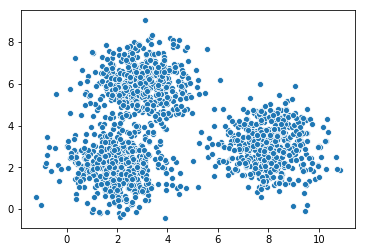

In [4]:
# Create data
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)

# Plot data
import seaborn as sns
sns.scatterplot(x = X[:,0], y=X[:,1])

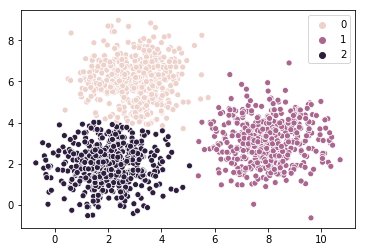

In [3]:
# Create model
model = KMeansClustering(3)
model.fit(X)
labels = model.predict()
# Plot model
sns.scatterplot(x = X[:,0], y=X[:,1], hue = labels)

# III. References

Machine Learning cơ bản - K-means Clustering [https://machinelearningcoban.com/2017/01/01/kmeans/]